In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

In [3]:
X.shape

(4, 1)

In [4]:
y.shape

(4,)

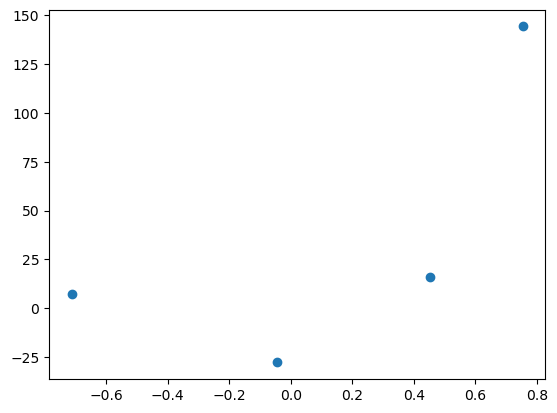

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

Let's apply OLS first so that we can find intercept (b) and then the value of b is our destination 

In [6]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [8]:
reg.coef_

array([78.35063668])

In [9]:
reg.intercept_

26.15963284313262

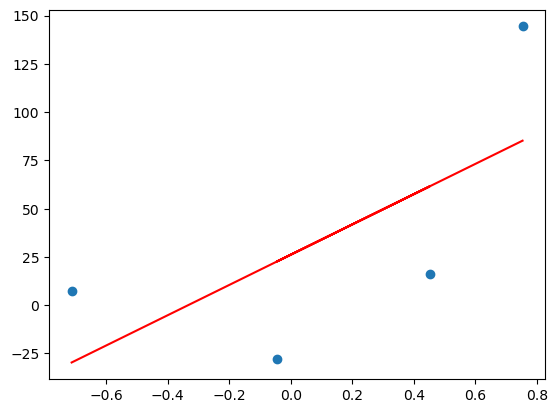

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [64]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

In [65]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

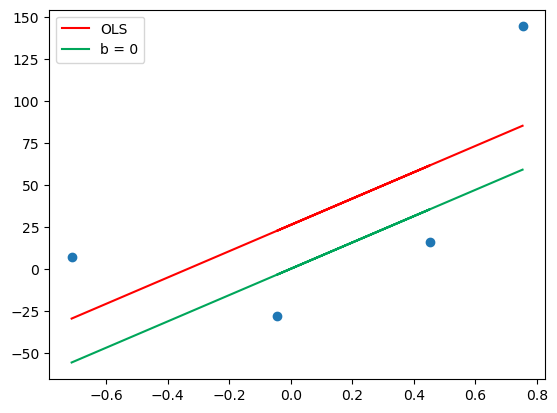

In [66]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')  #linear regression prediction (OLS)
plt.plot(X,y_pred,color='#00a65a',label='b = 0')    #prediction when b=0
plt.legend()
plt.show()

* Iteration 1

In [81]:
#calculating slope on l at b=0
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.27763408209216

In [83]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr #step size 
step_size

-20.927763408209216

In [84]:
# Calculating the new intercept
b1 = b - step_size
b1

20.927763408209216

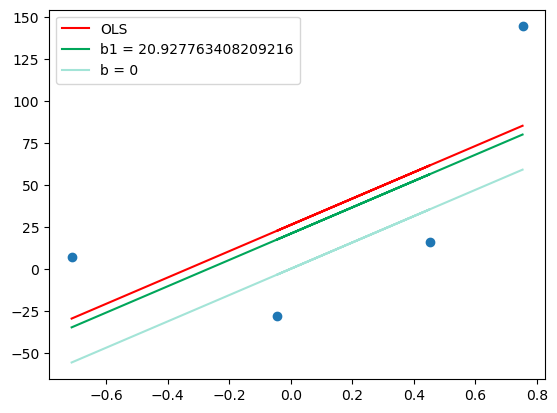

In [85]:
y_pred1 = ((78.35 * X) + b1).reshape(4)  #prediction when at b1

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = {}'.format(b))
plt.legend()
plt.show()

* Iteration 2

In [98]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b1) #slope on l at b1
loss_slope

-41.85552681641843

In [87]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [88]:
b2 = b1 - step_size
b2

25.11331608985106

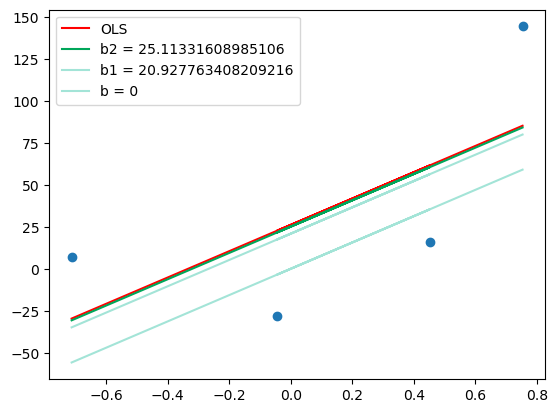

In [89]:
y_pred2 = ((78.35 * X) + b2).reshape(4) #prediction at  b2

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

* Iteration 3

In [99]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b2) #slope on l at b2
loss_slope

-8.371105363283675

In [100]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [101]:
b3 = b2 - step_size
b3

25.95042662617943

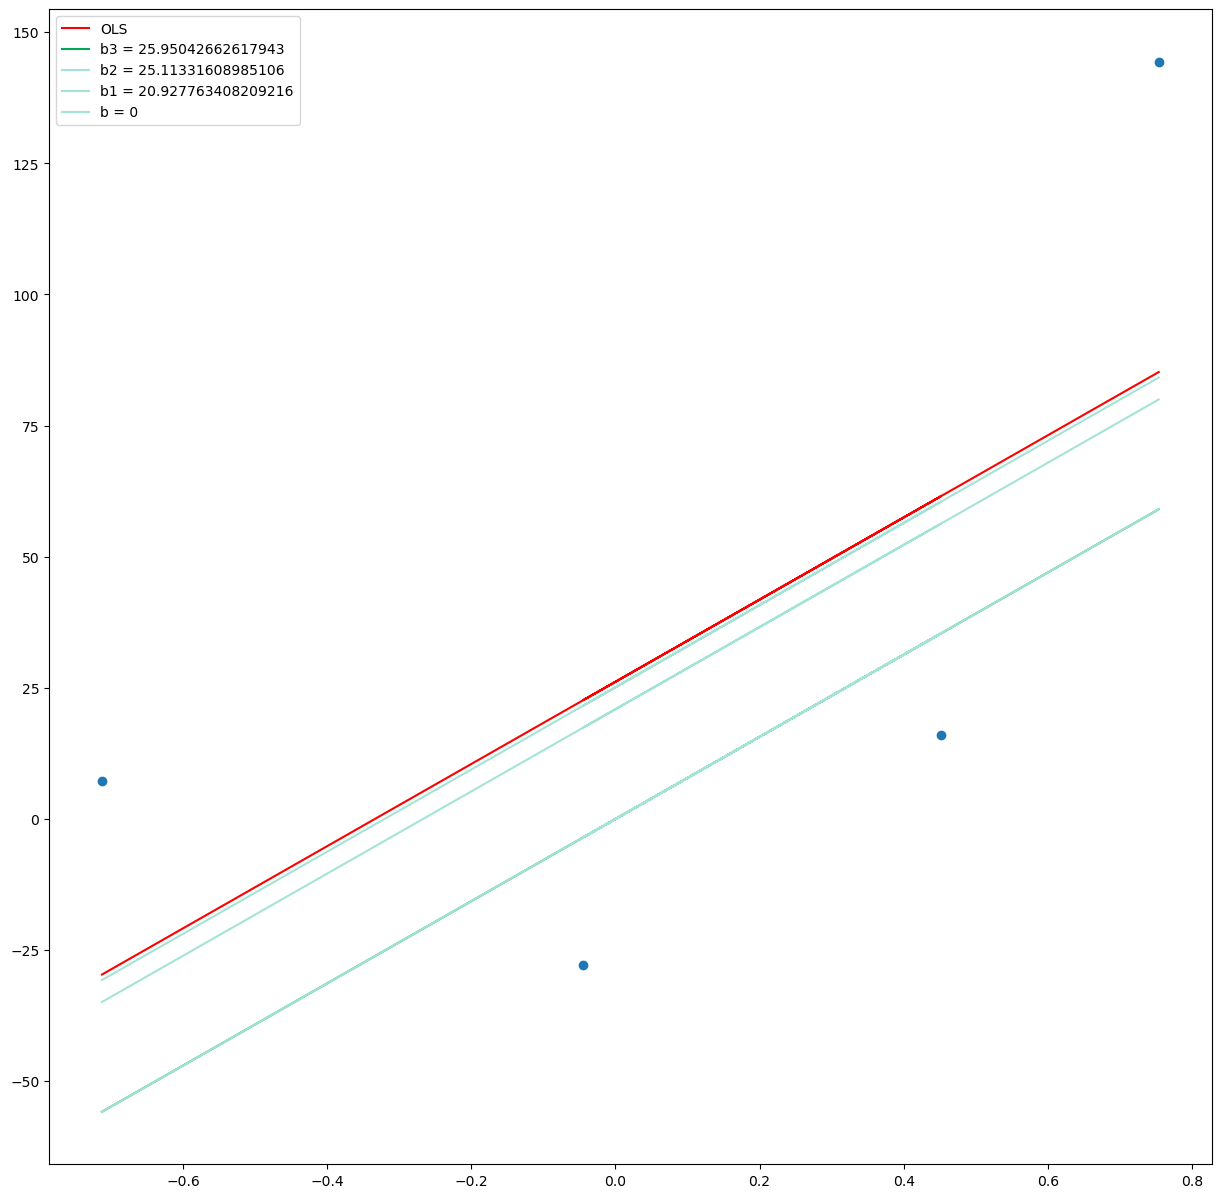

In [102]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b3 = {}'.format(b3))
plt.plot(X,y_pred2,color='#A3E4D7',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

* Iteration 4

In [103]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b3) #slope on l at b3
loss_slope

-1.674221072656735

In [104]:
step_size = loss_slope*lr
step_size

-0.16742210726567353

In [108]:
b4 = b3 - step_size
b

0.16742210726567353

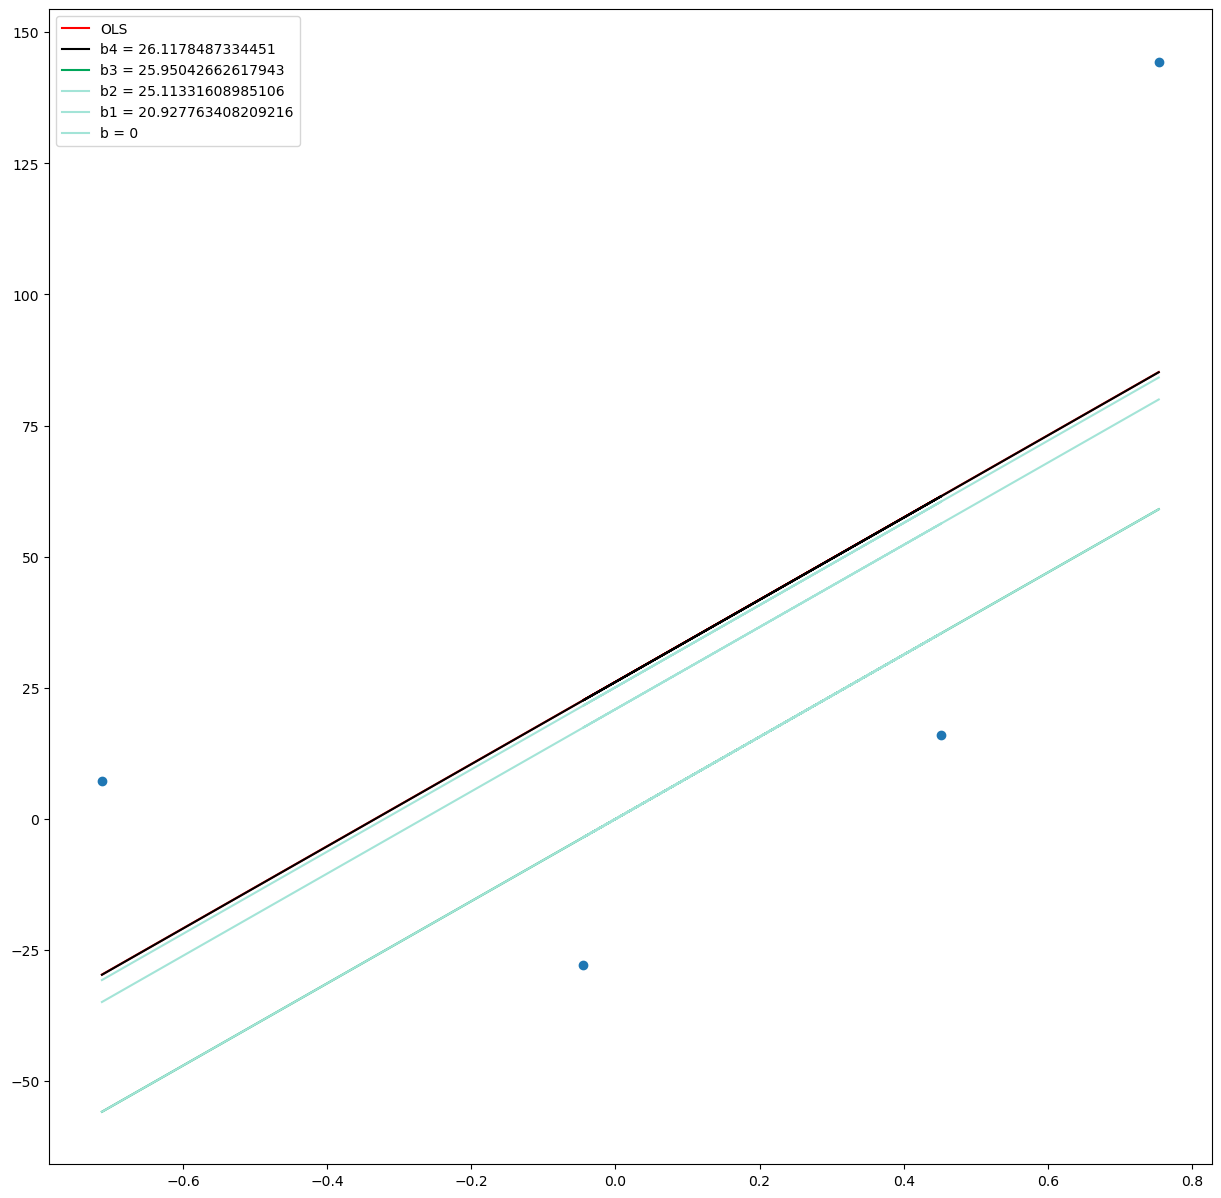

In [110]:
y_pred4 = ((78.35 * X) + b4).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred4,color='black',label='b4 = {}'.format(b4))
plt.plot(X,y_pred3,color='#00a65a',label='b3 = {}'.format(b3))
plt.plot(X,y_pred2,color='#A3E4D7',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

Now all above steps in a loop to plot the graph

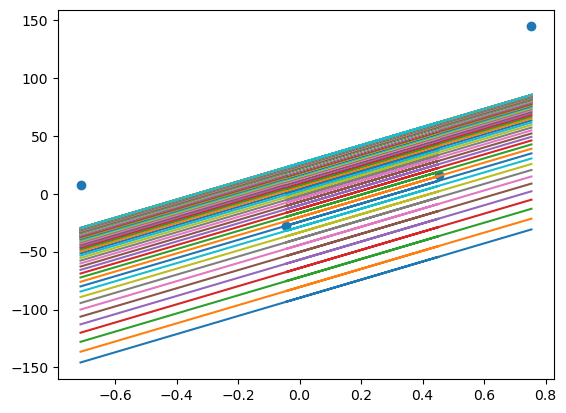

In [111]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

Creating GDregressor class from scratch